<a href="https://colab.research.google.com/github/smitjiwani/reinforcement-learning/blob/main/rl6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MultiArmedBandit:
    def __init__(self, k=10):
        self.k = k
        self.q_true = np.random.normal(0, 1, k)
        self.best_arm = np.argmax(self.q_true)

    def pull_arm(self, arm):
        return np.random.normal(self.q_true[arm], 1)

In [ ]:

# Create a class for Agent
class Agent:
    def __init__(self, bandit, strategy="epsilon_greedy", epsilon=0.1, c=2):
        self.bandit = bandit
        self.strategy = strategy
        self.epsilon = epsilon
        self.c = c
        self.k = bandit.k
        self.Q = np.zeros(self.k)
        self.N = np.zeros(self.k)

    def select_action(self, t):
        if self.strategy == "epsilon_greedy":
            if np.random.rand() < self.epsilon:
                return np.random.randint(self.k)
            return np.argmax(self.Q)

        elif self.strategy == "ucb1":
            if 0 in self.N:
                return np.argmin(self.N)
            return np.argmax(self.Q + self.c * np.sqrt(np.log(t + 1) / self.N))

        elif self.strategy == "thompson_sampling":
            samples = np.random.normal(self.Q, 1 / (self.N + 1))
            return np.argmax(samples)

    def update(self, arm, reward):
        self.N[arm] += 1
        self.Q[arm] += (reward - self.Q[arm]) / self.N[arm]

In [ ]:

def run_strategy(k=10, steps=1000, runs=200, strategies=["epsilon_greedy", "ucb1"]):
    avg_rewards = {strategy: np.zeros(steps) for strategy in strategies}

    for strategy in strategies:
        for run in range(runs):
            bandit = MultiArmedBandit(k)
            agent = Agent(bandit, strategy=strategy)

            rewards = np.zeros(steps)
            for t in range(steps):
                action = agent.select_action(t)
                reward = bandit.pull_arm(action)
                agent.update(action, reward)
                rewards[t] = reward

            avg_rewards[strategy] += rewards / runs

    return avg_rewards

In [ ]:
# Run the experiment
strategies = ["epsilon_greedy", "ucb1"]
results = run_strategy()

In [ ]:
results.keys()

dict_keys(['epsilon_greedy', 'ucb1'])

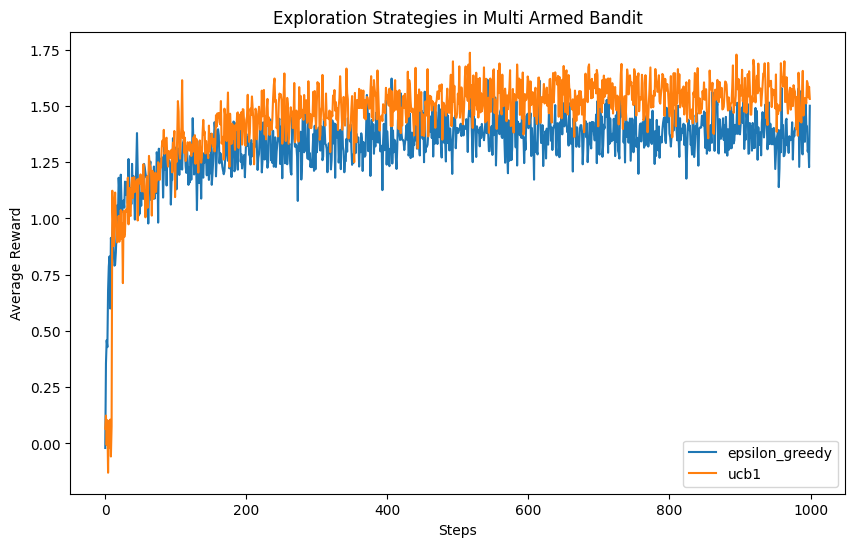

In [ ]:

plt.figure(figsize=(10,6)) # Plot the results
for strategy, rewards in results.items():
  plt.plot(rewards, label=strategy)
plt.xlabel( "Steps")
plt.ylabel( "Average Reward")
plt.legend()
plt.title("Exploration Strategies in Multi Armed Bandit")
plt.show()

This interpret that the long term reward for ucb is highest.
In initial Stage epsilon was better and ucb was exploring all the arms.
Till 100 runs both have similar performance and then UCB Leads.

### Observations
#### Initial Phase (First 100 Steps)

* Both strategies start with low rewards and improve over time.

* UCB1 shows a faster initial learning rate, meaning it finds better arms more quickly.

#### Middle Phase (100 - 500 Steps)

* UCB1 consistently outperforms Epsilon-Greedy with slightly higher rewards.

* Epsilon-Greedy fluctuates more, as it keeps exploring randomly with probability ϵ.

#### Final Phase (500 - 1000 Steps)

* UCB1 stabilizes at a slightly higher average reward.

* Epsilon-Greedy keeps fluctuating due to its continued exploration.

* UCB1's confidence-based exploration leads to better long-term exploitation.